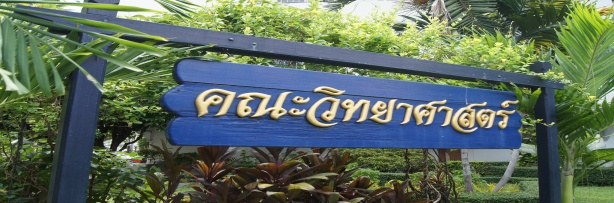

### <span style='color:tomato;'>Image Spatial Transform</span>

**<span style='color:lightblue;'>Image spatial transformation</span>** is a process that involves manipulating an image to change its spatial configuration. This can include operations such as rotation, scaling (resizing), translation (shifting), and shearing. These transformations can be applied for various purposes, such as correcting image orientation, aligning images in a dataset, or preparing images for further analysis or display. The essence of spatial transformation is to map the positions of pixels in an input image to new positions in an output image, according to a specified transformation rule.

Spatial transformations are typically described using mathematical models. A common model is the affine transformation, which supports translation, rotation, scaling, and shearing, and can be represented by a matrix. More complex transformations, like perspective or nonlinear warping, require more sophisticated models.

These transformations are crucial in many areas of computer vision, image processing, and graphics, as they allow for the geometric manipulation of images to achieve desired outcomes or to simulate particular perspectives or effects. For example, in computer vision, spatial transformations are used to simulate the viewpoint changes of a camera, while in graphics, they might be used to create animations or adjust images to fit display screens of different sizes.



In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

### Image Generation

In [2]:
def generate_image(rows,cols):
    img = np.random.randint(0, 256, size=(rows, cols))
    y, x = np.mgrid[0:rows, 0:cols]
    return img, y, x

In [2]:
def centroid_image(img):
    r,c = img.shape
    return (int(r/2),int(c/2)) 

In [13]:
def ShowImage(img):
    plt.axis("off")
    plt.imshow(img, cmap='gray')
    plt.show()

### 2D Geometric Transformation

#### <span style='color:tomato;'>2D Translation</span>

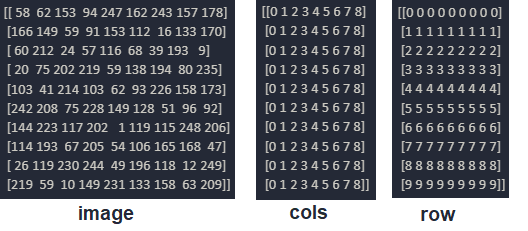


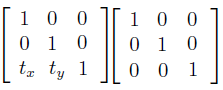      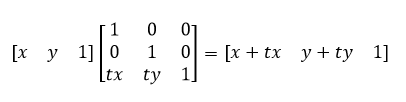   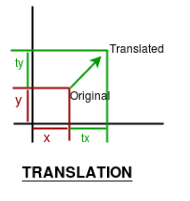

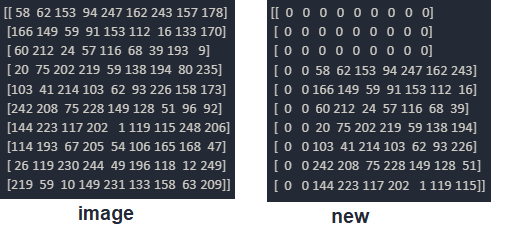

#### <span style='color:tomato;'>Image Translation Function</span>

In [5]:
def img_translation(img, tx, ty):
    out = np.zeros_like(img, dtype='uint8')
    Ts =  np.identity(3, dtype = float)
    Ts[2,0] = tx
    Ts[2,1] = ty
    rows, cols = img.shape
    for y in range(rows):
        for x in range(cols):
            xy = np.array([x, y, 1], dtype = float)
            new_xy = np.matmul(xy,Ts)
            xn = int(new_xy[0])
            yn = int(new_xy[1])
            if 0 <= xn < cols and 0 <= yn < rows:
                out[yn,xn] = img[y,x]
    return out.astype(np.uint8)

### <span style='color:tomato;'>Image Translation Usage</span>

#### <span style='color:orange;'>The Synthetic Image</span>

In [6]:
height, width = 12,10
img, y, x = generate_image(height, width)
img = img.astype(np.uint8)
cen = centroid_image(img)
print(cen[0], cen[1])

6 5


In [7]:
#res = img_translation(img, 2, 3)
res = img_translation(img, cen[1], cen[0])
print(img)
print(res)

[[146  83 218  86  45 210 225 145  61 139]
 [237  51 109 241  56 116 214 228 251 134]
 [154 217  39  20 118 126  47 185 154 228]
 [184 107 241  31 105 173  39 134 254 127]
 [167  74  16  51 228  82 169 113 133 120]
 [ 89  73 114  98 222  95 209 212  69  70]
 [214   4  10 132  65 200 190  47   6 100]
 [ 35 254 164 138  38 118 218 114  53 108]
 [215 101 169 214 135 232 117  85  23 177]
 [138  97 105  47 132 111 122 105 204   6]
 [  4 215 139 174 159 161  36  89 176 205]
 [ 13  33 223 173  38  31 235  31 169 139]]
[[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 146  83 218  86  45]
 [  0   0   0   0   0 237  51 109 241  56]
 [  0   0   0   0   0 154 217  39  20 118]
 [  0   0   0   0   0 184 107 241  31 105]
 [  0   0   0   0   0 167  74  16  51 228]
 [  0   0 

#### <span style='color:orange;'>The Digital Image</span>

In [8]:
img = cv2.imread("./images/cameraman.png", 0)
cen = centroid_image(img)
print(cen)

(256, 256)


In [9]:
res = img_translation(img, -cen[1], -cen[0])

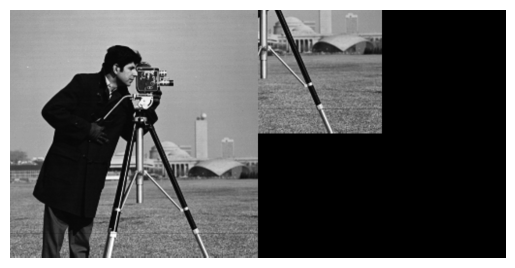

In [10]:
mul_img = cv2.hconcat([img, res])
ShowImage(mul_img)

#### <span style='color:tomato;'>2D Scale Transformation</span>

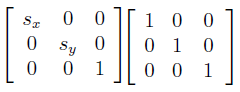   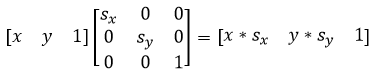    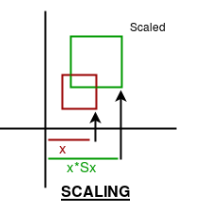

In [11]:
def img_scaling(img, sx, sy):
    out = np.zeros_like(img, dtype='uint8')
    S =  np.identity(3, dtype = float)
    S[0,0] = sx
    S[1,1] = sy
    rows, cols = img.shape
    for y in range(rows):
        for x in range(cols):
            xy = np.array([x, y, 1], dtype = float)
            new_xy = np.matmul(xy,S)
            xn = int(new_xy[0])
            yn = int(new_xy[1])
            if 0 <= xn < cols and 0 <= yn < rows:
                out[yn,xn] = img[y,x]
    return out.astype(np.uint8)

### <span style='color:tomato;'>Image Scaling Usage</span>

In [12]:
res = img_scaling(img, 1.15, 1.15)

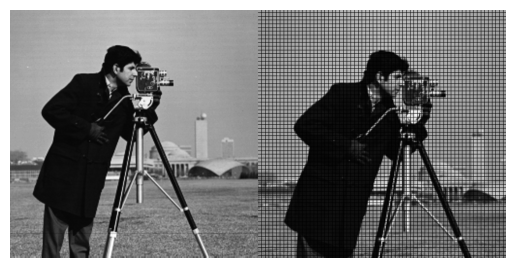

In [13]:
mul_img = cv2.hconcat([img, res])
ShowImage(mul_img)

### <span style='color:tomato;'>Applicable  Matrix Composition</span>
#### <span style='color:orange;'>Create Transformation Matrix</span>

In [4]:
def init_Transformation():
    return np.identity(3, dtype = float)

In [5]:
def matrix_Translate(T, tx, ty):
    Ts =  np.identity(3, dtype = float)
    Ts[2,0] = tx
    Ts[2,1] = ty
    return np.matmul(Ts, T)

In [6]:
def matrix_Scale(T, sx, sy):
    S =  np.identity(3, dtype = float)
    S[0,0] = sx
    S[1,1] = sy
    return  np.matmul(S, T)    

In [7]:
def img_transform(img, T):
    out = np.zeros_like(img, dtype='uint8')
    rows, cols = img.shape
    for y in range(rows):
        for x in range(cols):
            xy = np.array([x, y, 1], dtype = float)
            new_xy = np.matmul(xy, T)
            xn = int(new_xy[0])
            yn = int(new_xy[1])
            if 0 <= xn < cols and 0 <= yn < rows:
                out[yn,xn] = img[y,x]
    return out.astype(np.uint8)

#### <span style='color:lightgreen;'>Matrix Transformation Usage</span>
**<span style='color:lightblue;'>Simple Example</span>**

In [18]:

img = cv2.imread("./images/cameraman.png", 0)
T = init_Transformation()
T = matrix_Translate(T, 50, 50)
out_ts = img_transform(img, T)

In [19]:
T = init_Transformation()
T = matrix_Scale(T, 0.8, 0.8)
out_scale = img_transform(img, T)

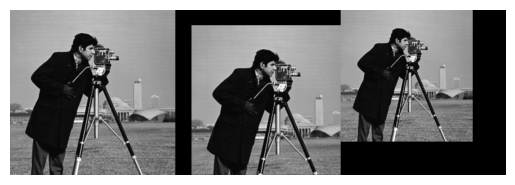

In [20]:
mul_img = cv2.hconcat([img, out_ts, out_scale])
ShowImage(mul_img)

**<span style='color:lightblue;'>Advance  Example</span>**

In [21]:
img = cv2.imread("./images/cameraman.png", 0)
cen = centroid_image(img)
T = init_Transformation()
T = matrix_Translate(T, cen[1], cen[0])
T = matrix_Scale(T, 0.5, 0.5)
T  = matrix_Translate(T, -cen[1], -cen[0])
out = img_transform(img, T)


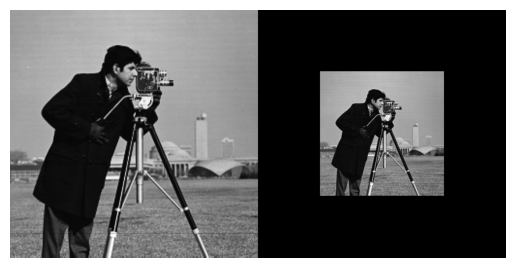

In [22]:
mul_img = cv2.hconcat([img, out])
ShowImage(mul_img)

#### <span style='color:tomato;'>2D Rotate Transformation</span>

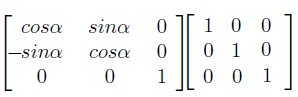     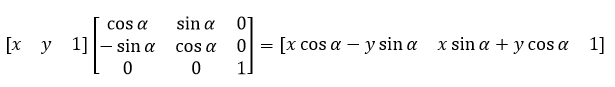     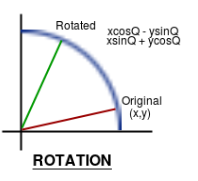

In [8]:
def matrix_Rotatef(T, theta):
    R =  np.identity(3, dtype = float)
    ang = (theta*np.pi)/180
    R[0,0] = math.cos(ang)
    R[0,1] = math.sin(ang)
    R[1,0] = -math.sin(ang)
    R[1,1] = math.cos(ang)
    return np.matmul(R, T)

In [11]:
img = cv2.imread("./images/cameraman.png", 0)
cen = centroid_image(img)

#### <span style='color:tomato;'>Rotation Transform Usage</span>
**<span style='color:tomato;'>Simple</span>**

In [12]:
T = init_Transformation()
T = matrix_Rotatef(T, -45)
out = img_transform(img, T)

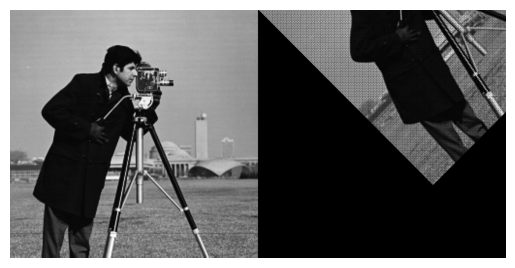

In [14]:
mul_img = cv2.hconcat([img, out])
ShowImage(mul_img)

**<span style='color:tomato;'>Advane Example 1</span>**

In [33]:
T = init_Transformation()
T = matrix_Translate(T, -cen[1], -cen[0])
T =matrix_Rotatef(T, -45)
T  = matrix_Translate(T, cen[1], cen[0])
out = img_transform(img, T)

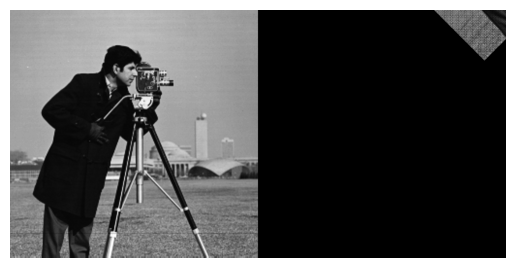

In [34]:
mul_img = cv2.hconcat([img, out])
ShowImage(mul_img)

**<span style='color:tomato;'>Advane Example 2</span>**

In [23]:
T = init_Transformation()
T = matrix_Translate(T, cen[1], cen[0])
T =matrix_Rotatef(T, -45)
T = matrix_Scale(T, 0.8, 0.8)
T  = matrix_Translate(T, -cen[1], -cen[0])
out = img_transform(img, T)

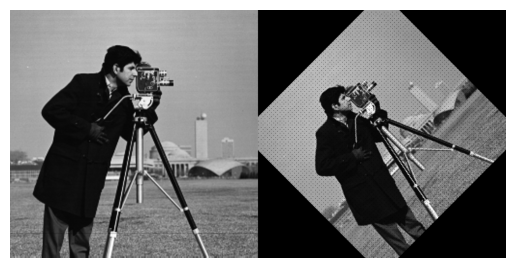

In [24]:
mul_img = cv2.hconcat([img, out])
ShowImage(mul_img)